<a href="https://colab.research.google.com/github/Vinoth1512/ML-PROJECTS/blob/main/Multilinearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [20]:
data=pd.read_csv("/content/50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [17]:
dummies=pd.get_dummies(data.State)
dummies.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [10]:
merge=pd.concat([data,dummies],axis=1)
merge.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


In [25]:
final=merge.drop("State",axis=1)
final.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [28]:
x=final.drop("Profit",axis=1)
y=final["Profit"]

In [36]:
xtest,xtrain,ytest,ytrain=train_test_split(x,y,test_size=1/3,random_state=30)
model=LinearRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
ypred

array([117449.51144813, 100001.73228816, 146355.13230514, 100478.94251417,
        78081.27966541,  90565.66068113,  77416.29539882, 102880.09776101,
       166326.32514356,  71139.17127285, 143969.59888482, 136617.93929147,
       181712.97117362, 126193.40351653, 143345.48557838, 112173.80558135,
       156458.3349328 , 117036.94292787,  58407.92583142,  63810.17383644,
       126241.23353002,  95809.54404786, 178510.76407355, 152406.17607029,
       167238.54427677, 127170.39192928, 174127.02840965, 108919.34185639,
       126427.45718403,  56152.27462691,  57632.61546292,  58027.18674008,
        97653.05784488])

In [42]:
ytest

24    108552.04
28    103282.38
8     152211.77
31     97483.56
42     71498.49
39     81005.76
36     90708.19
30     99937.59
4     166187.94
44     65200.33
15    129917.04
11    144259.40
0     192261.83
13    134307.35
14    132602.65
27    105008.31
6     156122.51
16    126992.93
46     49490.75
48     35673.41
18    124266.90
35     96479.51
1     191792.06
7     155752.60
3     182901.99
17    125370.37
2     191050.39
23    108733.99
12    141585.52
47     42559.73
45     64926.08
49     14681.40
37     89949.14
Name: Profit, dtype: float64

In [38]:
score=r2_score(ytest,ypred)
score

0.9244871682670627

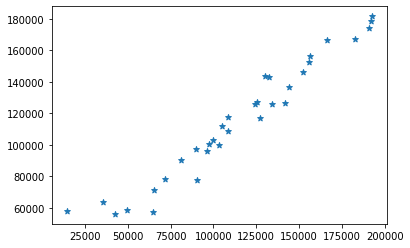

In [44]:
plt.scatter(ytest,ypred,marker='*')
plt.show()